In [127]:
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2
import os
import numpy as np
import torch
import torch.nn as nn
import torchvision
from torch.utils.data import Dataset, TensorDataset
from torch.utils.data import DataLoader
import livenet.datasets
device = "cuda"
torch.set_default_device("cpu")
from livenet.datasets import TransformDataset
from ai_libs.simple_log import LOG


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [95]:
imgs = []
labs = []
to_tensor = torchvision.transforms.ToTensor()
for i in range(2):
    imgs.append(to_tensor(dataset[i][0]))
    labs.append(torch.tensor(dataset[i][1]))

images = torch.stack(imgs)
labels = torch.tensor(labs)
labels = labels[:, None]

In [6]:

transform = torchvision.transforms.Compose(
    [
        # torchvision.transforms.RandomRotation(15),
        # torchvision.transforms.RandomCrop(32, padding=4, padding_mode="edge"),
        # torchvision.transforms.RandomHorizontalFlip(),
        torchvision.transforms.ColorJitter(0.1, 0.1, 0.1, 0.05),
        # cifar10_normalization
    ]
)


In [137]:
test_x, test_y = livenet.datasets.get_cifar10_test()
test = torch.utils.data.TensorDataset(test_x, test_y)
test_aug = TransformDataset(test, livenet.datasets.cifar10_train_transform)
test_loader = torch.utils.data.DataLoader(test_aug, batch_size=256, drop_last=True, shuffle=True, num_workers=4, pin_memory=True)

# train_x, train_y = livenet.datasets.get_cifar10_train()
# train = torch.utils.data.TensorDataset(train_x, train_y)
# train_aug = TransformDataset(train, livenet.datasets.train_transform)
# train_loader = torch.utils.data.DataLoader(train_aug, batch_size=4, drop_last=True, shuffle=True, num_workers=4, pin_memory=True)
# train_y.device


In [139]:
it = iter(test_loader)
for i, el in enumerate(it):
    LOG(i, len(el[0]))

0 256
1 256
2 256
3 256
4 256
5 256
6 256
7 256
8 256
9 256
10 256
11 256
12 256
13 256
14 256
15 256
16 256
17 256
18 256
19 256
20 256
21 256
22 256
23 256
24 256
25 256
26 256
27 256
28 256
29 256
30 256
31 256
32 256
33 256
34 256
35 256
36 256
37 256
38 256


In [125]:
imgnp = test_aug[0][0].numpy().transpose(1, 2, 0)
imgnp = (imgnp * 128 + 127)
from matplotlib import pyplot as plt
# plt.imshow(imgnp)
np.min(imgnp)

np.float32(9.0)

In [7]:
next(iter(train_loader))

[tensor([[[[-0.8376, -0.8220, -0.7493,  ..., -0.6875, -0.6875, -0.6875],
           [-0.8393, -0.7873, -0.7142,  ..., -0.6721, -0.6721, -0.6721],
           [-0.8198, -0.8049, -0.7684,  ..., -0.6203, -0.6203, -0.6203],
           ...,
           [-1.3471, -1.3316, -1.3327,  ..., -1.3085, -1.3085, -1.3085],
           [-1.3471, -1.3316, -1.3327,  ..., -1.3085, -1.3085, -1.3085],
           [-1.3471, -1.3316, -1.3327,  ..., -1.3085, -1.3085, -1.3085]],
 
          [[-0.3193, -0.2703, -0.2439,  ..., -0.3163, -0.3163, -0.3163],
           [-0.3166, -0.2687, -0.2371,  ..., -0.2698, -0.2698, -0.2698],
           [-0.3277, -0.2890, -0.2901,  ..., -0.2271, -0.2271, -0.2271],
           ...,
           [-1.0594, -1.0103, -0.9973,  ..., -1.0555, -1.0555, -1.0555],
           [-1.0594, -1.0103, -0.9973,  ..., -1.0555, -1.0555, -1.0555],
           [-1.0594, -1.0103, -0.9973,  ..., -1.0555, -1.0555, -1.0555]],
 
          [[ 0.2321,  0.2823,  0.2800,  ...,  0.0721,  0.0721,  0.0721],
           [ 

In [121]:
# tdata = TensorDataset(images, labels)
tdata = torch.utils.data.TensorDataset(images, labels)
transforms = torchvision.transforms.Compose(
    [
        # torchvision.transforms.ColorJitter(0.1, 0.1, 0.1, 0.1)
        #torchvision.transforms.RandomRotation(15)
        # torchvision.transforms.RandomCrop(32, padding=4, padding_mode="edge")
        # torchvision.transforms.RandomHorizontalFlip()
    ]
)
ttdata = TransformDataset(tdata, transforms)
len(ttdata)
loader = DataLoader(ttdata, batch_size=1)
it = iter(loader)

In [125]:

it = iter(loader)


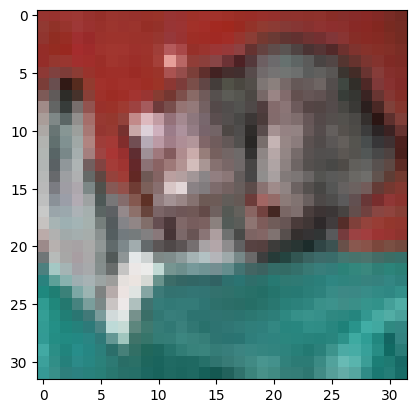

In [176]:
# imgnp = ttdata[0][0].permute(1, 2, 0)
it = iter(loader)
imgnp = next(it)[0][0].permute(1, 2, 0)


plt.imshow(imgnp)


In [41]:
from torch.utils.data import Dataset